<a href="https://colab.research.google.com/github/skozh/ADA1/blob/master/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

## **Generate Noisy Data**

In [21]:
def linear_fun(x, alpha, beta):
  return alpha*x+beta

In [22]:
def rational_fun(x, alpha, beta):
  return alpha/(1+beta*x)

In [23]:
alpha = np.random.rand()
beta = np.random.rand()
noise = np.random.normal(0,0.1,101)
print(alpha, beta)

0.4949679208416494 0.2957356700355449


In [24]:
k = [*range(0, 101, 1)]
x = np.array([x/100 for x in k])
y = alpha*x + beta + noise

In [25]:
def objective_linear(params):
  alpha, beta = params
  return np.sum(((alpha*x+beta)-y)**2)

In [26]:
def objective_rational(params):
  alpha, beta = params
  return np.sum(((alpha/(1+x*beta))-y)**2)

**Conjugate Gradient Descent**

Linear Approximant

In [27]:
initial = [0,0]
result = optimize.minimize(fun=objective_linear, x0=initial,method='CG', tol=0.001) 
result

     fun: 0.8383615605468537
     jac: array([9.23871994e-07, 1.93715096e-06])
 message: 'Optimization terminated successfully.'
    nfev: 20
     nit: 2
    njev: 5
  status: 0
 success: True
       x: array([0.47931563, 0.29657299])

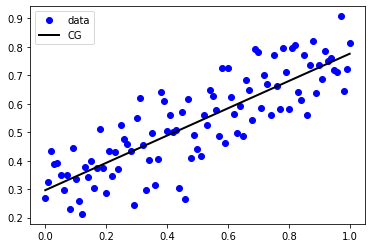

In [28]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, linear_fun(x, result.x[0],result.x[1]), '-k', lw=2, label='CG')
ax.legend()

Rational Approximant



In [29]:
initial = [0,0]
result = optimize.minimize(fun=objective_rational, x0=initial,method='CG', tol=0.001) 
result

     fun: 0.9164754091282847
     jac: array([-7.82385468e-05,  3.76328826e-05])
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 10
    njev: 23
  status: 0
 success: True
       x: array([ 0.36568611, -0.56183462])

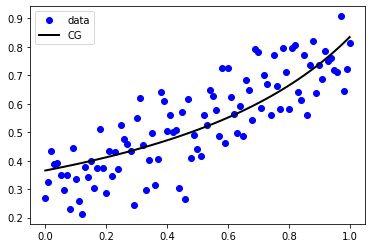

In [30]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, rational_fun(x, result.x[0],result.x[1]), '-k', lw=2, label='CG')
ax.legend()

**Newton's Method**

Linear Approximant

In [31]:
initial = [0,0]
fprime = lambda x: optimize.approx_fprime(x, objective_linear, 0.001)
result = optimize.minimize(fun=objective_linear, x0=initial,method='Newton-CG', tol=0.001, jac=fprime) 
result

     fun: 0.8383948950887411
     jac: array([-1.72241543e-06,  1.23109256e-06])
 message: 'Warning: Desired error not necessarily achieved due to precision loss.'
    nfev: 18
    nhev: 0
     nit: 2
    njev: 52
  status: 2
 success: False
       x: array([0.48028607, 0.29558778])

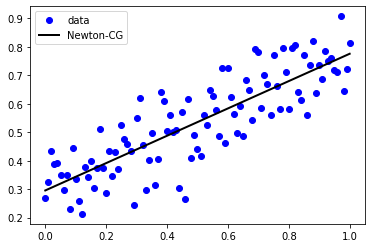

In [32]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, linear_fun(x, result.x[0],result.x[1]), '-k', lw=2, label='Newton-CG')
ax.legend()

Rational Approximant

In [33]:
initial = [0,0]
fprime = lambda x: optimize.approx_fprime(x, objective_rational, 0.001)
result = optimize.minimize(fun=objective_rational, x0=initial,method='Newton-CG', tol=0.001, jac=fprime) 
result

     fun: 0.9184548260785581
     jac: array([ 0.35749887, -0.35661649])
 message: 'Optimization terminated successfully.'
    nfev: 14
    nhev: 0
     nit: 7
    njev: 44
  status: 0
 success: True
       x: array([ 0.36029138, -0.57273498])

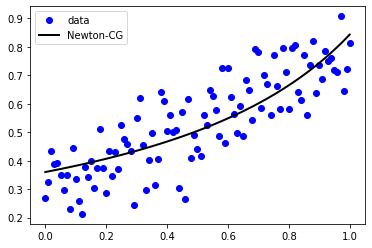

In [34]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, rational_fun(x, result.x[0],result.x[1]), '-k', lw=2, label='Newton-CG')
ax.legend()

**Levenberg-Marquardt algorithm**

Linear Approximant

In [35]:
result = optimize.curve_fit(linear_fun, x, y, method='lm')[0]
result

array([0.47931562, 0.296573  ])

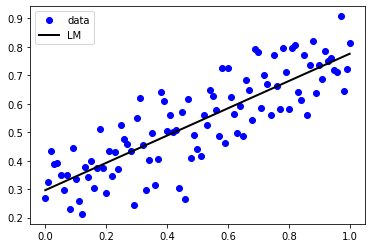

In [36]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, linear_fun(x, result[0],result[1]), '-k', lw=2, label='LM')
ax.legend()

Rational Approximant

In [37]:
result = optimize.curve_fit(rational_fun, x, y, method='lm')[0]
result

array([ 0.36568681, -0.56183338])

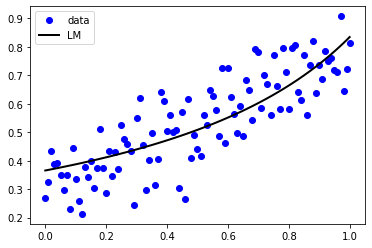

In [38]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, rational_fun(x, result[0],result[1]), '-k', lw=2, label='LM')
ax.legend()